The quantitative introduction lectures

# Lecture 2: Linear Regression

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import seaborn as sb
import matplotlib.pyplot as plt
pd.set_option('precision', 2)
%precision 2

'%.2f'

In [2]:
data = pd.read_csv('origin_mobility.csv')

# This lecture

In this lecture you will learn about linear regression. In particular, you will learn about:

* Linear functions.
* How to understand that linear regression find the linear function that best fits the data by minimizing the mean squared error.
* How to interpret the intercept and slope parameters for both numerical and categorical predictor variables.

MAYBE ALSO THE COEFFICIENT OF DETERMINATION AND CORRELATION COEFFICIENT. IF SO, USE THIS SUBJECT TO INTRODUCE SOME LOGICAL-MATHEMATICAL REASONING TASKS, SUCH AS WHY MAXIMIZING R2 IS THE SAME AS MINIMIZING MSE. MAYBE SPLIT LECTURE IN TWO.

# Introducing linear regression

In the last lecture you saw how the scatter plot can be used to visualize the relationship between two numerical variables. As an example, see the scatter plot below displaying the relationship between the commuting zones' mobility and german population shares.

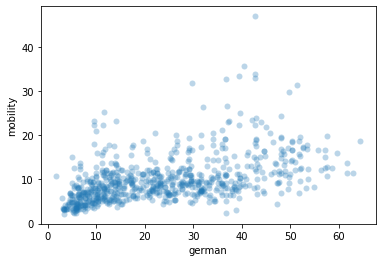

In [3]:
sb.scatterplot('german','mobility',data=data,alpha=0.3, linewidth=0);

But what if we wanted to quantify the relationship between these two variables? What if we wanted to summarize the relationship with only a few numbers? Linear regression is one possible tool for obtaining these goals. It is a method for determining the parameters of the line that best fits the data (according to a well-defined criteria that you will learn about later in today's lecture). 

For instance, the line determined by linearly regressing the *mobility* variable on the *german* variable looks like this:

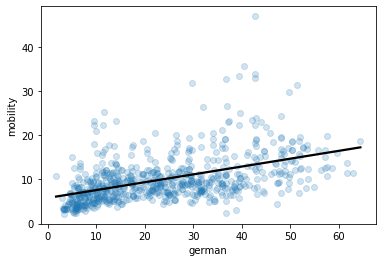

In [4]:
sb.regplot('german','mobility',data=data,ci=None,scatter_kws={'alpha':0.2},line_kws={'color':'black'});

The parameters of the line are its *slope*:

In [5]:
mob_ger = sm.ols('mobility~german',data=data).fit()
mob_ger.params['german'].round(2)

0.18

and its *intercept* (its intersection with the y-axis):

In [6]:
mob_ger.params['Intercept'].round(2)

5.82

The line determined by linearly regressing the *mobility* variable on the *german* variable thus has the linear function:

<p style="text-align: center;"> $m(g) = 5.82 + 0.18\cdot g$ </p>

where $m$ and $g$ denote the values of commuting zones' *mobility* and *german* variable.

**Exercise 2.1:** Consider a commuting zone with a 4 percent german population share. What predicted value of *mobility* does this commuting zone have according to the linear model above? What about one with 18 percent german population share? How much does a commuting zone's predicted mobility increase for each 1 percent point increase of the zone's german population share?

# Linear models: One predictor

## Linear functions with one predictor

A linear function with one predictor has the form:

<p style="text-align: center;"> $y(x) = \beta_0 + \beta_1 \cdot x$ </p>

The following terminology is used to denote the terms of the function:
* $y$ is called the *outcome*
* $x$ is called the *predictor*
* $\beta_0$ and $\beta_1$ are called the *parameters*

The parameters $\beta_0$ and $\beta_1$ are - respectively - the intercept and slope of the linear function. The intercept is the value of the function, when $x=0$. The slope is the increase of the outcome, when the predictor increases with 1.

**Exercise 2.2:** Argue why it can be seen from the functional form $y(x) = \beta_0 + \beta_1 \cdot x$ that $\beta_0$ and $\beta_1$ are the intercept and the slope.

**Exercise 2.3:** Look at the lines on the plot below and match them to the following linear functions:

<p style="text-align: center;"> $y(x) = -1 + 1.5 x$ </p>
<p style="text-align: center;"> $y(x) = 2 - x$ </p>
<p style="text-align: center;"> $y(x) = 1.5 x$ </p>
<p style="text-align: center;"> $y(x) = 2 - 0.5 x$ </p>

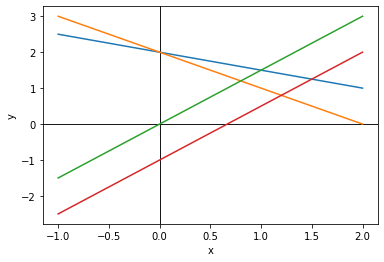

In [7]:
linfuns = pd.DataFrame({'x':[-1,2]})
linfuns['y1'] = 2 - 0.5*linfuns['x']
linfuns['y2'] = 2 - linfuns['x']
linfuns['y3'] = 1.5*linfuns['x']
linfuns['y4'] = -1 + 1.5*linfuns['x']

f_lines, axes_lines = plt.subplots(1, 1, figsize=(6, 4))
axes_lines.axvline(0,color='black',linewidth=0.9)
axes_lines.axhline(0,color='black',linewidth=0.9)
for y,col in zip(linfuns.columns[1:],('b','r','y','g')) : 
    axes_lines.plot(linfuns['x'],linfuns[y])
axes_lines.set(xlabel='x',ylabel='y');

## The best-fitting line

A linear regression of a variable *y* on a variable *x* determines the parameters - that is, the intercept and the slope - of the linear function that best fits the data. However, what does it mean for one linear function to better fit the data than another linear function? The criteria used in linear regression is that it is the linear function that minimizes the mean squared error between the function's fitted values and the actual values in the data. This definition is quite a mouthful, and I will now try to unpack it step by step.

### Fitted values

Consider a linear function that predicts the *mobility* variable from the *german* variable:

<p style="text-align: center;"> $m(g) = \beta_0 + \beta_1 \cdot g$ </p>

This is also known as a linear model with *mobility* as the outcome and *german* as the predictor. If we set $\beta_0=2$ and $\beta_1=0.5$, the function would have the form:

<p style="text-align: center;"> $m(g) = 2 + 0.5 \cdot g$ </p>

This linear model's fitted *mobility* values is found by plugging the actual values of the *german* variable into the function and calculating the resulting values. 

**Exercise 2.4:** Calculate the fitted *mobility* values for the observations below according to the linear model $m(g) = 2 + 0.5 \cdot g$. Execute the second cell below to see if you were correct.

In [8]:
data.loc[0:3,['german','mobility']]

,german,mobility
0,13.41,6.22
1,9.91,5.37
2,8.36,7.26
3,12.63,5.63


In [9]:
data['fitted_mobility'] = 2 + 0.5*data['german']
data.loc[0:2,['german','mobility','fitted_mobility']]

,german,mobility,fitted_mobility
0,13.41,6.22,8.71
1,9.91,5.37,6.96
2,8.36,7.26,6.18


The blue and orange dots in the plot below display - respectively - the actual and fitted mobility values that you have just calculated. The fitted values follows a line, because they were calculated using a linear model.

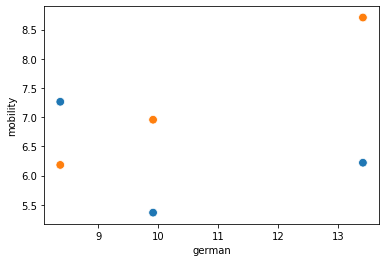

In [10]:
ax_fitted = sb.scatterplot('german','value',hue='variable',s=75,
                           data=pd.melt(data.loc[0:2,['german','mobility','fitted_mobility']],id_vars='german'))
ax_fitted.set(ylabel='mobility')
ax_fitted.legend_.remove();

The plot below displays the fitted mobility values for the entire dataset:

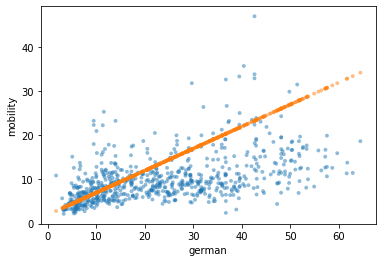

In [11]:
ax_fitted = sb.scatterplot('german','value',hue='variable',linewidth=0,alpha=0.5,s=15,
                           data=pd.melt(data[['german','mobility','fitted_mobility']],id_vars='german'))
ax_fitted.set(ylabel='mobility')
ax_fitted.legend_.remove();

**Exercise 2.5:** Calculate the fitted *mobility* values for the observations below according to a linear model with parameters $\beta_0=6$ and $\beta_1=0.1$. Execute the second cell below to see if you were correct.

In [12]:
data.loc[0:2,['german','mobility']]

,german,mobility
0,13.41,6.22
1,9.91,5.37
2,8.36,7.26


In [13]:
data['fitted_mobility_f2'] = 6 + 0.1*data['german']
data.loc[0:2,['german','mobility','fitted_mobility_f2']]

,german,mobility,fitted_mobility_f2
0,13.41,6.22,7.34
1,9.91,5.37,6.99
2,8.36,7.26,6.84


The green dots in the plot below are the fitted values according to the second linear model.

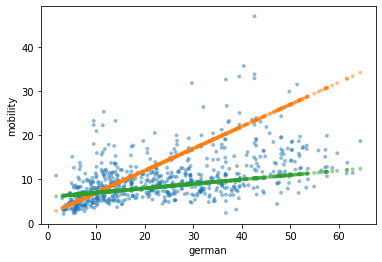

In [14]:
f_fitted, axes_fitted = plt.subplots(1, 1, figsize=(6, 4))
ax_fitted = sb.scatterplot('german','value',hue='variable',linewidth=0,alpha=0.5,ax=axes_fitted,s=15,
                           data=pd.melt(data[['german','mobility','fitted_mobility','fitted_mobility_f2']],id_vars='german'))
ax_fitted.set(ylabel='mobility')
ax_fitted.legend_.remove();

### Errors

The errors of a linear model is the difference between the model's fitted outcome values and the actual outcome values in the data. It is simply calculated by subtracting the the fitted values from the actual values.

**Exercise 2.6:** Calculate the errors for the observations below according to the linear model from exercise 2.4 (the models fitted values are shown below). Execute the second cell below to see if you were correct.

In [15]:
data.loc[0:2,['german','mobility','fitted_mobility']]

,german,mobility,fitted_mobility
0,13.41,6.22,8.71
1,9.91,5.37,6.96
2,8.36,7.26,6.18


In [16]:
data['error'] = data['mobility'] - data['fitted_mobility']
data.loc[0:2,['german','mobility','fitted_mobility','error']]

,german,mobility,fitted_mobility,error
0,13.41,6.22,8.71,-2.49
1,9.91,5.37,6.96,-1.59
2,8.36,7.26,6.18,1.08


Calculate the errors for the observations below according to the linear model from exercise 2.5 (the models fitted values are shown below). Execute the second cell below to see if you were correct.

In [17]:
data.loc[0:2,['german','mobility','fitted_mobility_f2']]

,german,mobility,fitted_mobility_f2
0,13.41,6.22,7.34
1,9.91,5.37,6.99
2,8.36,7.26,6.84


In [18]:
data['error_f2'] = data['mobility'] - data['fitted_mobility_f2']
data.loc[0:2,['german','mobility','fitted_mobility_f2','error_f2']]

,german,mobility,fitted_mobility_f2,error_f2
0,13.41,6.22,7.34,-1.12
1,9.91,5.37,6.99,-1.63
2,8.36,7.26,6.84,0.43


### Mean squared error

The mean squared error $MSE$ is calculated by first squaring the errors and then taking the mean of them. The formula can be written as:

<p style="text-align: center;"> $MSE = \frac{1}{n}(e_1^2 + e_2^2 + ... + e_n^2)$ </p>

where $n$ is the number of observations and $e_i$ is the error for the $i^{th}$ observation.

**Exercise 2.7:** Calculate the mean squared error for the observations below with the linear model from exercise 2.4 (the model's errors are shown below). Execute the second cell below to see if you were correct.

In [19]:
data.loc[0:2,['german','mobility','fitted_mobility','error']]

,german,mobility,fitted_mobility,error
0,13.41,6.22,8.71,-2.49
1,9.91,5.37,6.96,-1.59
2,8.36,7.26,6.18,1.08


In [20]:
data.loc[0:2,'error'].pow(2).mean()

3.29

Calculate the mean squared error for the observations below with the linear model from exercise 2.5 (the model's errors are shown below). Execute the second cell below to see if you were correct.

In [21]:
data.loc[0:2,['german','mobility','fitted_mobility_f2','error_f2']]

,german,mobility,fitted_mobility_f2,error_f2
0,13.41,6.22,7.34,-1.12
1,9.91,5.37,6.99,-1.63
2,8.36,7.26,6.84,0.43


In [22]:
data.loc[0:2,'error_f2'].pow(2).mean()

1.36

### Minimization of mean squared error

Now that you understand the mean squared error of a linear model, you can also understand how linear regression - as well as many other quantitative models - compares how well different models fit the data: The model with the smallest mean squared error is said to be the best fitting model.

**Exercise 2.8:** Use the plot below to judge which of the linear models from exercise 2.4 and 2.5 you think fits the data best. Execute the second cell below to see, if your judgement is in agreement with the principle of minimizing the mean squared error.

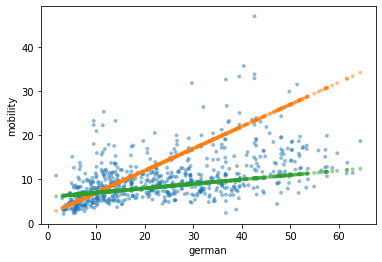

In [23]:
f_fitted

In [24]:
mse_f1 = np.round(data['error'].pow(2).mean(),2)
mse_f2 = np.round(data['error_f2'].pow(2).mean(),2)
print('MSE of model from ex 2.4 (orange line): {}\nMSE of model from ex 2.5 (green line): {}'.format(mse_f1,mse_f2))

MSE of model from ex 2.4 (orange line): 57.83
MSE of model from ex 2.5 (green line): 25.41


Although the $MSE$ of the linear model from exercise 2.5 is smaller than the $MSE$ of the linear model from exercise 2.4, there might be another linear model with an even smaller $MSE$. This model would be an even better fit to the data according to the principle of minimizing the mean squared error. Linear regression is a statistical method for determining the parameters of the linear model with the minimal $MSE$ among all possible linear models. In the introduction paragraph, you saw that a linear regression with *mobility* as the outcome and *german* as the predictor resulted in this linear model:

<p style="text-align: center;"> $m(g) = 5.82 + 0.18\cdot g$ </p>

This model has a smaller $MSE$ than any other linear model with *mobility* as outcome and *german* as predictor. In particular, it has a smaller $MSE$ than both models from the exercises above. Its fitted values are plotted with red dots below:

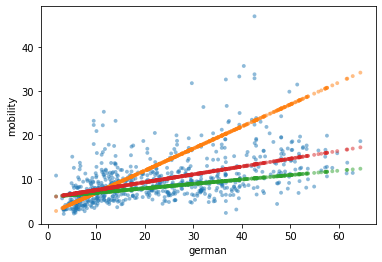

In [25]:
data['fitted_mobility_lr'] = mob_ger.fittedvalues
f_fitted, axes_fitted = plt.subplots(1, 1, figsize=(6, 4))
ax_fitted = sb.scatterplot('german','value',hue='variable',linewidth=0,alpha=0.5,ax=axes_fitted,s=15,
                           data=pd.melt(data[['german','mobility','fitted_mobility','fitted_mobility_f2','fitted_mobility_lr']],
                                        id_vars='german'))
ax_fitted.set(ylabel='mobility')
ax_fitted.legend_.remove();

**Exercise 2.9:** Why would you say that $MSE$ is a reasonable measure of how well a model fits the data? *Hints:* What does each error measure? What is the problem with just summing the errors without squaring them first?

Although $MSE$ is the standard measure of model fit in linear regression - and a very common one in quantitative modelling as such - it is by no means the only meaningful one. Another reasonable choice would be the mean absolute error, denoted by $MAE$:

<p style="text-align: center;"> $MAE = \frac{1}{n}(|r_1| + |r_2| + ... + |r_n|)$ </p>

Note: The absolute value $|a|$ of a number $a$ is just its non-negative value. E.g. $|3|=|-3|=3$.

The linear model that has the minimal value of $MAE$ out of all possible linear models is not necessarily the same linear model as the one that has the minimal value of $MSE$. In fact, they will almost always be different, but how different will depend on the concrete dataset. The reasons that $MSE$ is more commonly used than $MAE$ are mainly mathematical - most importantly, the mathematical toolbox of calculus does not play as well with absolute values as with squared values.

**Exercise 2.10:** Say that you want to make a linear model of the data plotted below:

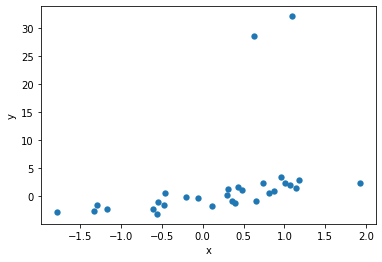

In [26]:
np.random.seed(1654)
data_w_outliers = pd.DataFrame({'x':np.random.normal(size=30)})
data_w_outliers['y'] = np.concatenate([np.random.normal(size=28,loc=2*data_w_outliers.loc[0:27,'x']),
                                       np.random.normal(size=2,loc=30+2*data_w_outliers.loc[28:,'x'])])
sb.scatterplot('x','y',data=data_w_outliers,linewidth=0,s=40);

The outcome $y$ has some large outliers (some values that lie in a very different range than the rest of the values). You fit two linear models: 

* One linear model that minimizes $MSE$ (this is the linear model found by linearly regressing *y* on *x*).
* Another linear model that minimizes $MAE$ (this model is found by a statistical method called quantile regression).

The plot below shows the lines of the two models:

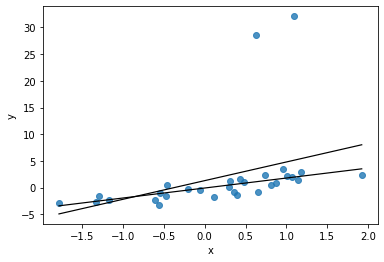

In [27]:
linreg_outliers = sm.ols('y~x',data=data_w_outliers).fit()
qreg_outliers = sm.quantreg('y~x',data=data_w_outliers).fit(q=0.5)
f_outliers, axes_outliers = plt.subplots(1, 1, figsize=(6, 4))
sb.regplot('x','y',ax=axes_outliers,data=data_w_outliers,ci=None,line_kws={'color':'black','linewidth':1.2})
sb.lineplot(data_w_outliers['x'],qreg_outliers.fittedvalues,color='black',linewidth=1.2);

The functions of the fitted models are:

<p style="text-align: center;"> $m(g) = 1.31 + 3.49\cdot g$ </p>
<p style="text-align: center;"> $m(g) = -0.07 + 1.87\cdot g$ </p>

We see from the plot that one of the models is more influenced by the presence of the outliers than the other model: Its slope is raised to decrease the errors to the outliers at the expense of increasing the errors to many of the other observations. Which of models do you think is the one most strongly influence by the outliers? Is it the model found by minimizing the $MSE$ or the $MAE$. Why do you think so? *Hint:* How does taking the square versus the absolute value of the errors treat large errors differently?

What would you say are the advantages and disadvantages of letting the model be more or less strongly influenced by outliers in the outcome variable?

---

Now I have tried to unpack what it means that a linear regression finds the linear model that best fits the data by minimizing the mean squared error. If you are in still in doubt about how to understand this principle, then try to watch [this](https://www.youtube.com/watch?v=6OvhLPS7rj4) and/or [this](https://www.youtube.com/watch?v=PaFPbb66DxQ) video.

## Categorical predictor

We can also use linear regression with a categorical instead of a numerical predictor by encoding the categories with so-called dummies, which are variables consisting of 0's and 1's. In this lecture, we will only learn how to do this for a binary variable (a categorical variable with two categories), but the technique can be extended to categorical variables with any number of categories. To encode a binary variable as a dummy, we simply decide that one of categories is encoded as a 0 and the other as a 1.

For instance, our data contains the boolean variable *south* (a boolean variable is a binary variable with the categories "True" and "False"). We can encode *south* as a dummy by choosing to encode the "False" as 0 and "True" as 1 (this is the standard dummy encoding for a boolean variable). After we have dummy coded *south*, we can fit a linear regression with *mobility* as outcome and *south* as predictor, since *south* now has numbers - concretely, 0's and 1's - as its values. The fitting is done from exactly the same principles as with the *german* predictor. In particular, the linear regression determines the values of the parameters $\beta_0$ and $\beta_1$ in the function:

<p style="text-align: center;"> $m(s) = \beta_0 + \beta_1\cdot s$ </p>

such that the resulting linear model has the minimal $MSE$ out of all possible linear models with *mobility* as outcome and *south* as predictor. The only difference is that the *south* predictor (denoted by $s$) only contains 0's and 1's and that these numbers should not be interpreted as measuring anything quantitative, but as representing two different categories.

The values of the found parameters are:

In [28]:
mob_south = sm.ols('mobility~south',data=data).fit()
mob_south.params

Intercept        11.72
south[T.True]    -4.18
dtype: float64

The fitted linear model has the intercept $\beta_0=11.72$ and slope $\beta_1=-4.18$, which results in the linear function:

<p style="text-align: center;"> $m(s) = 11.72 - 4.18\cdot s$ </p>

**Exercise 2.11:** Calculate the fitted *mobility* value with this model for a commuting zone from a non-southern region. Do the same for a commuting zone from a southern region. Execute the cell below to see, if you were correct.

In [29]:
dict(zip(['non-southern','southern'],mob_south.fittedvalues.sort_values(ascending=False).round(2).unique()))

{'non-southern': 11.72, 'southern': 7.55}

With a numerical predictor - such as the *german* variable - the parameters $\beta_0$ and $\beta_1$ can be interpreted as one would normally interpret the parameters of a linear function. The intercept $\beta_0$ is the predicted outcome value, when the predictor is equal to 0. The slope $\beta_1$ is the increase in the predicted outcome each time the predictor increases with 1. Thus, the interpretation of the intercept and slope in the model from the last section:

<p style="text-align: center;"> $m(g) = 5.82 + 0.18\cdot g$ </p>

is that the model predicts a *mobility* of 5.82 in a commuting zone with a german population share of 0 percent, and that it predicts that the *mobility* increases by 0.18 for each unit increase in the german population share.

The interpretation of the parameters is different, when the predictor is categorical.

**Exercise 2.12:** How would you interpret the intercept $\beta_0=11.72$ and slope $\beta_1=-4.18$ in the linear model with *mobility* as outcome and *south* as predictor? *Hint:* How did the parameters affect your calculation of the fitted *mobility* values of the southern versus the non-southern commuting zones in the last exercise? If you have troubles figuring it out, then read the paragraph *Interpreting coefficients of categorical predictor variables* in [this blogpost](https://www.theanalysisfactor.com/interpreting-regression-coefficients/).


# Linear models: Multiple predictors

## Linear functions with multiple predictors

A linear function with outcome $y$ and $n$ predictors $x_1,x_2...,x_n$ has the form:

<p style="text-align: center;"> $y(x_1,x_2,...,x_n) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$ </p>

The parameter $\beta_0$ is still called the intercept and is the value of $y$, when all the predictors are equal to 0. The parameters $\beta_1,\beta_2,...,\beta_n$ are called the slope parameters. The $i^{th}$ slope parameter $\beta_i$ is interpreted as the increase in the predicted outcome when the $i^{th}$ predictor $x_i$ is increased by 1 and all other predictors are held constant.

**Exercise 2.13:** Write up the linear function with outcome $y$, predictors $x_1,x_2$ and $x_3$ and parameters $(\beta_0,\beta_1,\beta_2,\beta_3)=(3,2,-1,0.5)$. Calculate the outcome values with the following values of the predictors:

* $(x_1,x_2,x_3)=(0,0,0)$
* $(x_1,x_2,x_3)=(5,3,8)$
* $(x_1,x_2,x_3)=(6,3,8)$
* $(x_1,x_2,x_3)=(7,3,4)$

## Linear models with multiple predictors

A linear model with *mobility* as outcome and the predictors *german* and *south* has the functional form:

<p style="text-align: center;"> $m(g,s) = \beta_0 + \beta_1g + \beta_2s$ </p>

The fitted values, errors and $MSE$ can be calculated exactly the same way as with one predictor variable.

**Exercise 2.14:** Let the parameters be given as $(\beta_0,\beta_1,\beta_2)=(9,0.25,-5)$ in a linear model with *mobility* as outcome and *german* and *south* as predictors (where *south* is dummy coded with "False" as 0 and "True" as 1). Calculate the fitted values, errors and $MSE$ for the first three observations in the data (shown below). Execute the second and third cell below to see, if you were correct.

In [31]:
data.loc[0:2,['german','south','mobility']]

,german,south,mobility
0,13.41,True,6.22
1,9.91,True,5.37
2,8.36,True,7.26


In [38]:
data['fitted_mobility'] = 9 + 0.25*data['german'] - 5*data['south']
data['error'] = data['mobility'] - data['fitted_mobility']
data.loc[0:2,['german','south','mobility','fitted_mobility','error']]

,german,south,mobility,fitted_mobility,error
0,13.41,True,6.22,7.35,-1.13
1,9.91,True,5.37,6.48,-1.11
2,8.36,True,7.26,6.09,1.17


In [39]:
print('MSE: {}'.format(np.round(data.loc[0:2,'error'].pow(2).mean(),2)))

MSE: 1.3


**Exercise 2.15:** The model with $(\beta_0,\beta_1,\beta_2)=(9,0.25,-5)$ has $MSE$:

In [40]:
data['error'].pow(2).mean()

38.97

whereas a model with $(\beta_0,\beta_1,\beta_2)=(6,0.5,-6)$ has $MSE:$

In [35]:
data['error_f2'] = data['mobility'] - (6 + 0.5*data['german'] - 6*data['south'])
data['error_f2'].pow(2).mean()

98.47

Which model is the best fit to the data according to the fitting criteria used in linear regression?

**Exercise 2.16:** The linear model found by linearly regressing $mobility$ on the predictors $german$ and $south$ has the parameters:

In [36]:
mob_ger_south = sm.ols('mobility~german+south',data).fit()
mob_ger_south.params

Intercept        6.80
south[T.True]   -1.02
german           0.15
dtype: float64

which we denote $(\beta_0,\beta_1,\beta_2)=(6.80,0.15,-1.02)$. Write up the resulting linear function. 

What is the predicted *mobility* of a southern commuting zone with a german population share of 10 percent? What about a non-southern commuting zone with the same german population share? What is the predicted *mobility* of a southern commuting zone with a german population of 5 percent? What about a southern commuting zone with a german population share of 6 percent?

What is the interpretation of each of the parameters?

The model has an $MSE$ of:

In [37]:
mob_ger_south.resid.pow(2).mean()

21.23

What do we know about the $MSE$ of any other linear model with *mobility* as outcome and *german* and *south* as predictors?